### EDA Project

I have selected the client Timothy Stevens who is a seller and who owns expensive houses in the center, needs to get rid, best timing within a year, open for renovation when profits rise.

To the following stake holder requirements I have formulated the following hypothesis.

**Hypothesis:**

1. Price adjustment to the expensive apartments can cause a sale within a period of one year.<br>
2. Renovating the current state of the apartments would lead to increase in profit margins.<br>
3. Homes in central zip codes have higher prices regardless of grade or condition.<br>

1. Handle the Imports

In [3]:
import pandas as pd
import numpy as np
from time import sleep
import missingno as msno
pd.__version__

'2.3.3'

1.1 Get Data into dataframes

In [4]:
df_prices = pd.read_csv('data\eda_price_data.csv', delimiter=',')
df_housing = pd.read_csv('data\eda_house_details.csv', delimiter=',')


1.2 Check the individual data

In [5]:
price_data_list = [df_prices.head(10),df_prices.info()]

for i in price_data_list:
    print(i)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      21597 non-null  object 
 1   price     21597 non-null  float64
 2   house_id  21597 non-null  int64  
 3   id        21597 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 675.0+ KB
         date      price    house_id  id
0  2014-10-13   221900.0  7129300520   1
1  2014-12-09   538000.0  6414100192   2
2  2015-02-25   180000.0  5631500400   3
3  2014-12-09   604000.0  2487200875   4
4  2015-02-18   510000.0  1954400510   5
5  2014-05-12  1230000.0  7237550310   6
6  2014-06-27   257500.0  1321400060   7
7  2015-01-15   291850.0  2008000270   8
8  2015-04-15   229500.0  2414600126   9
9  2015-03-12   323000.0  3793500160  10
None


In [6]:
housing_data_list = [df_housing.head(10),df_housing.info()]

for i in housing_data_list:
    print(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

<Axes: >

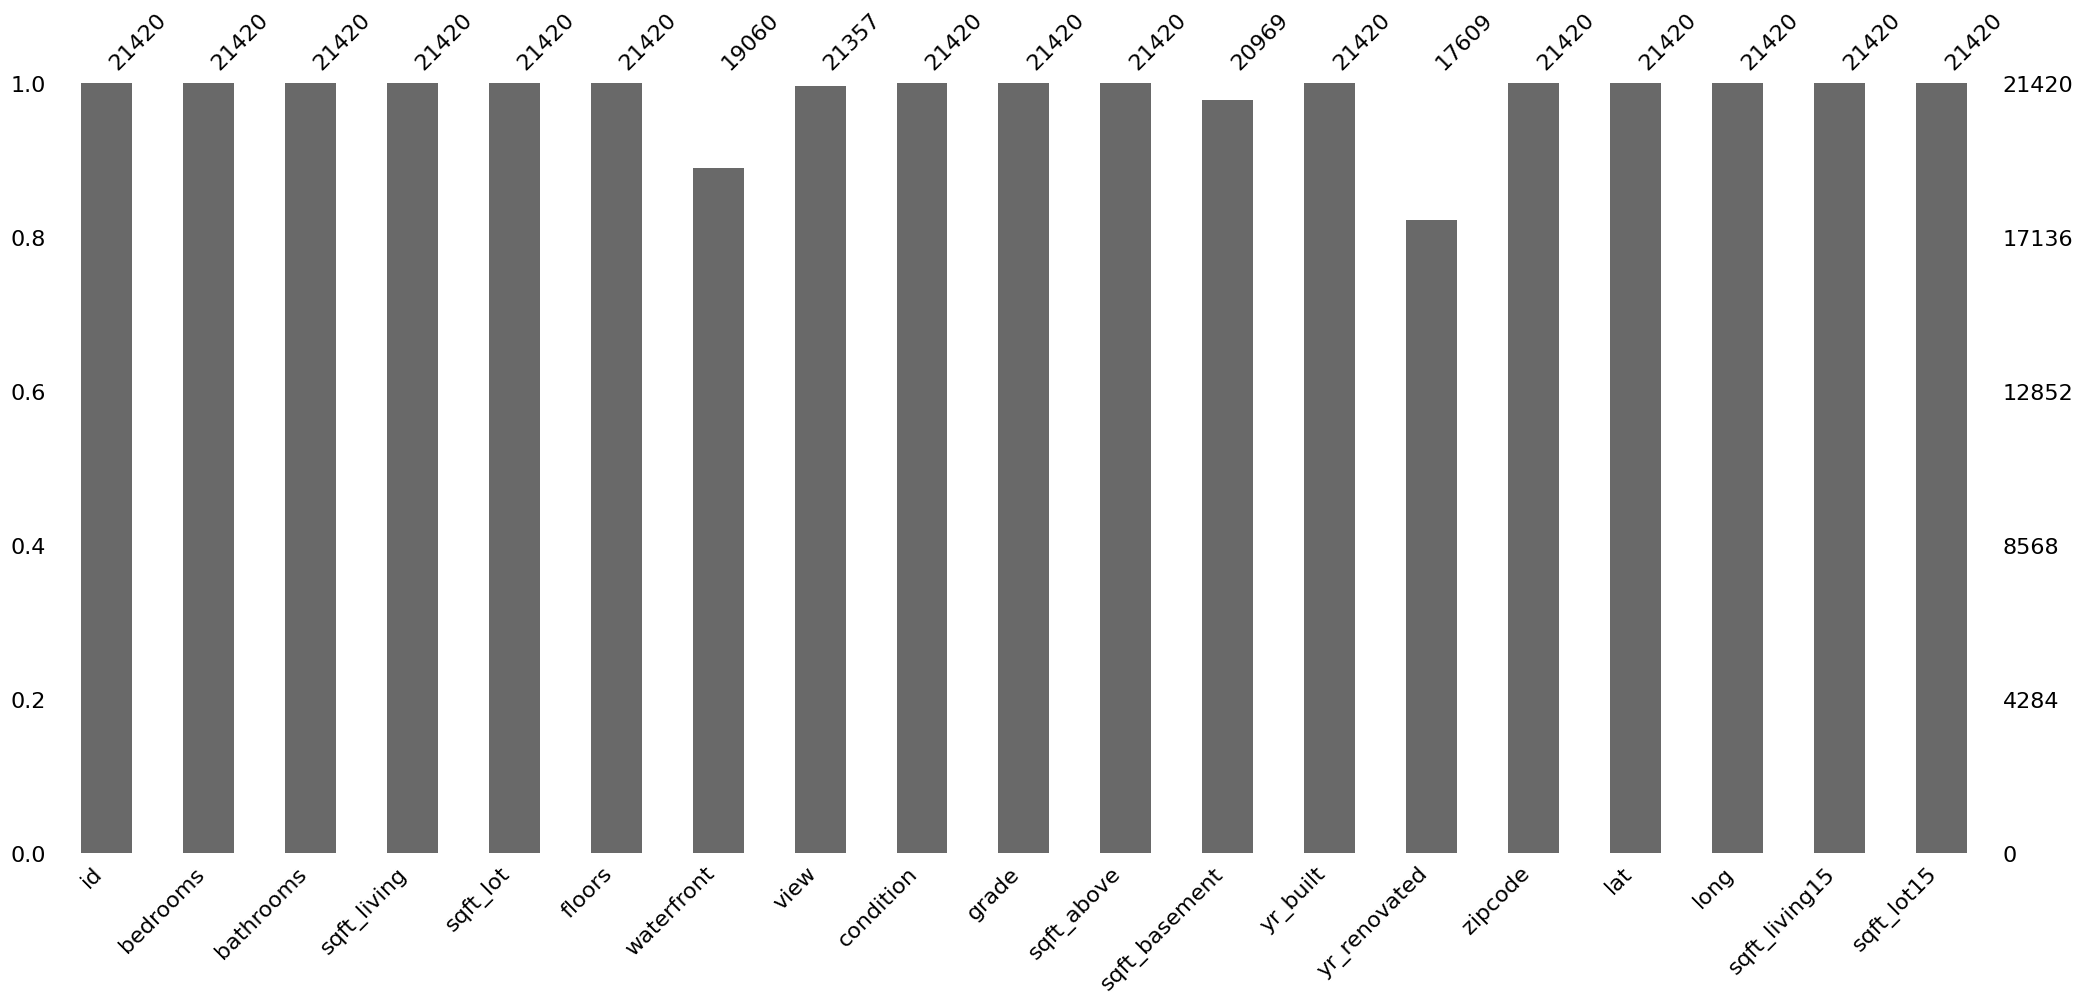

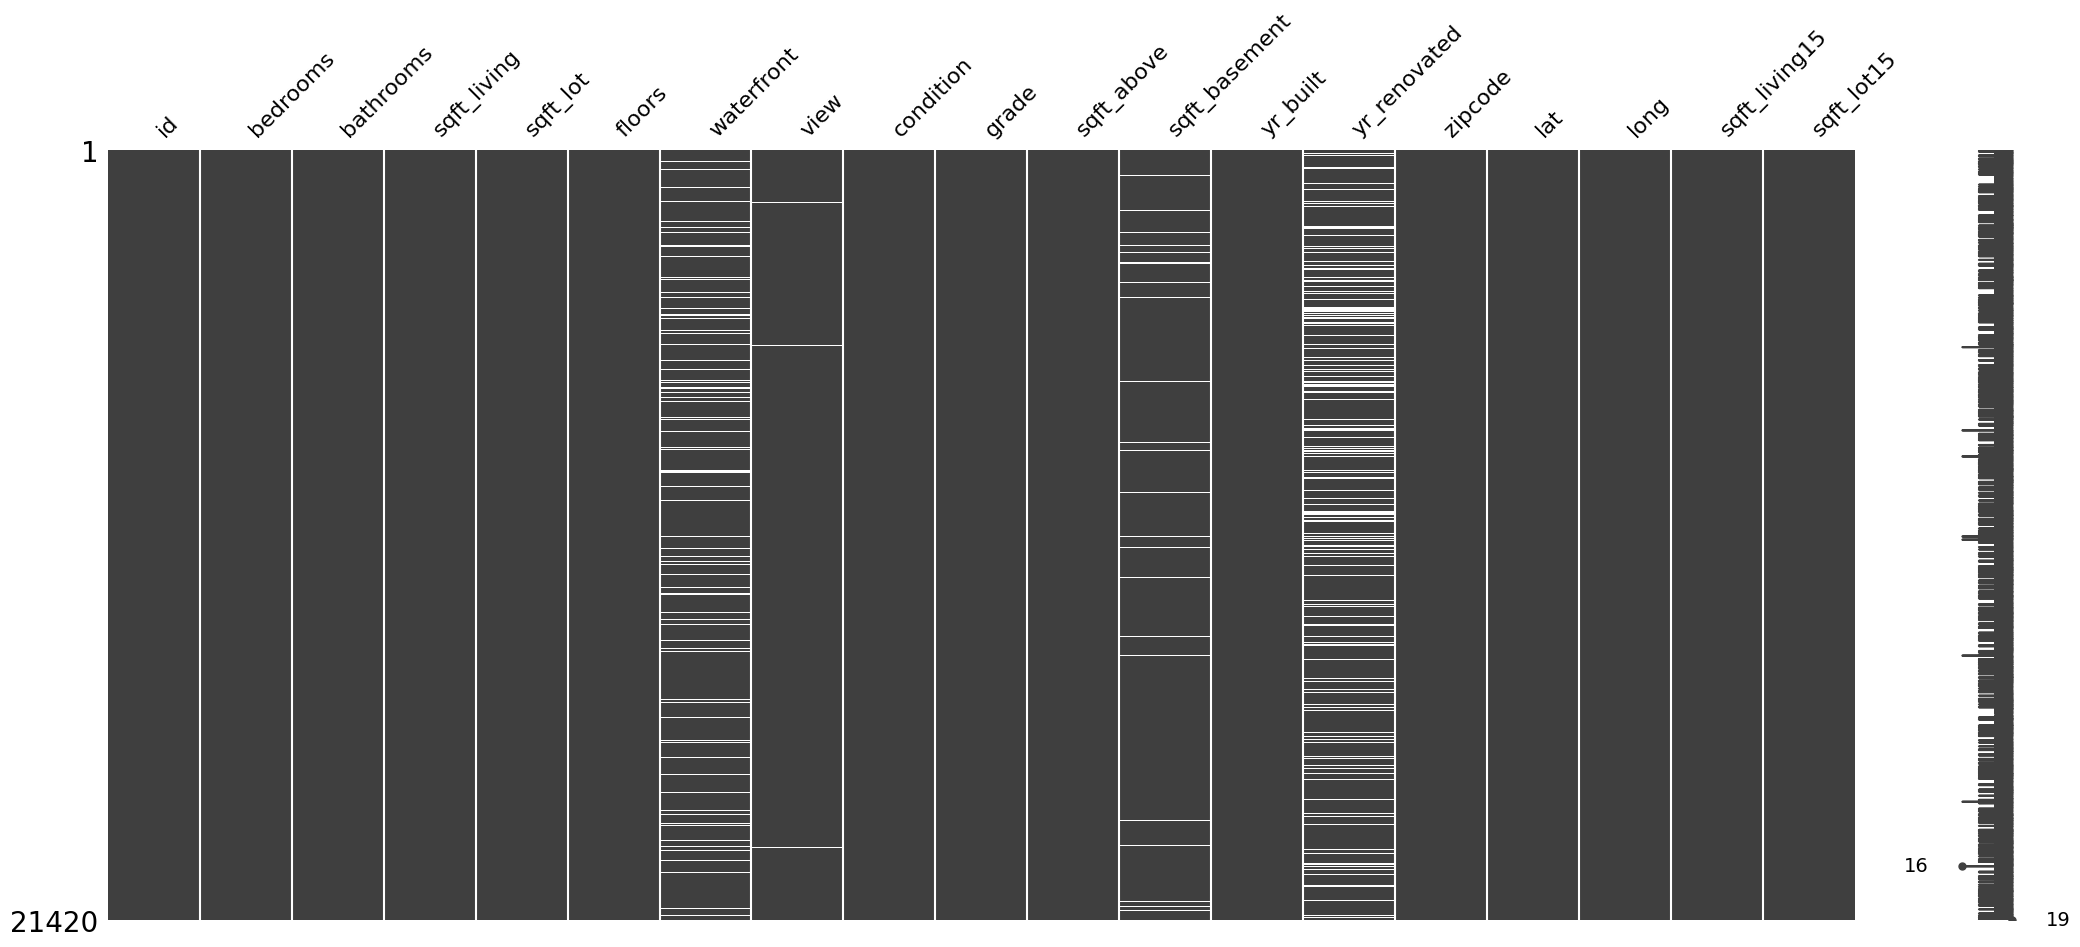

In [7]:
# Finding clues within the data for better decision making

msno.bar(df_housing)
msno.matrix(df_housing)

<Axes: >

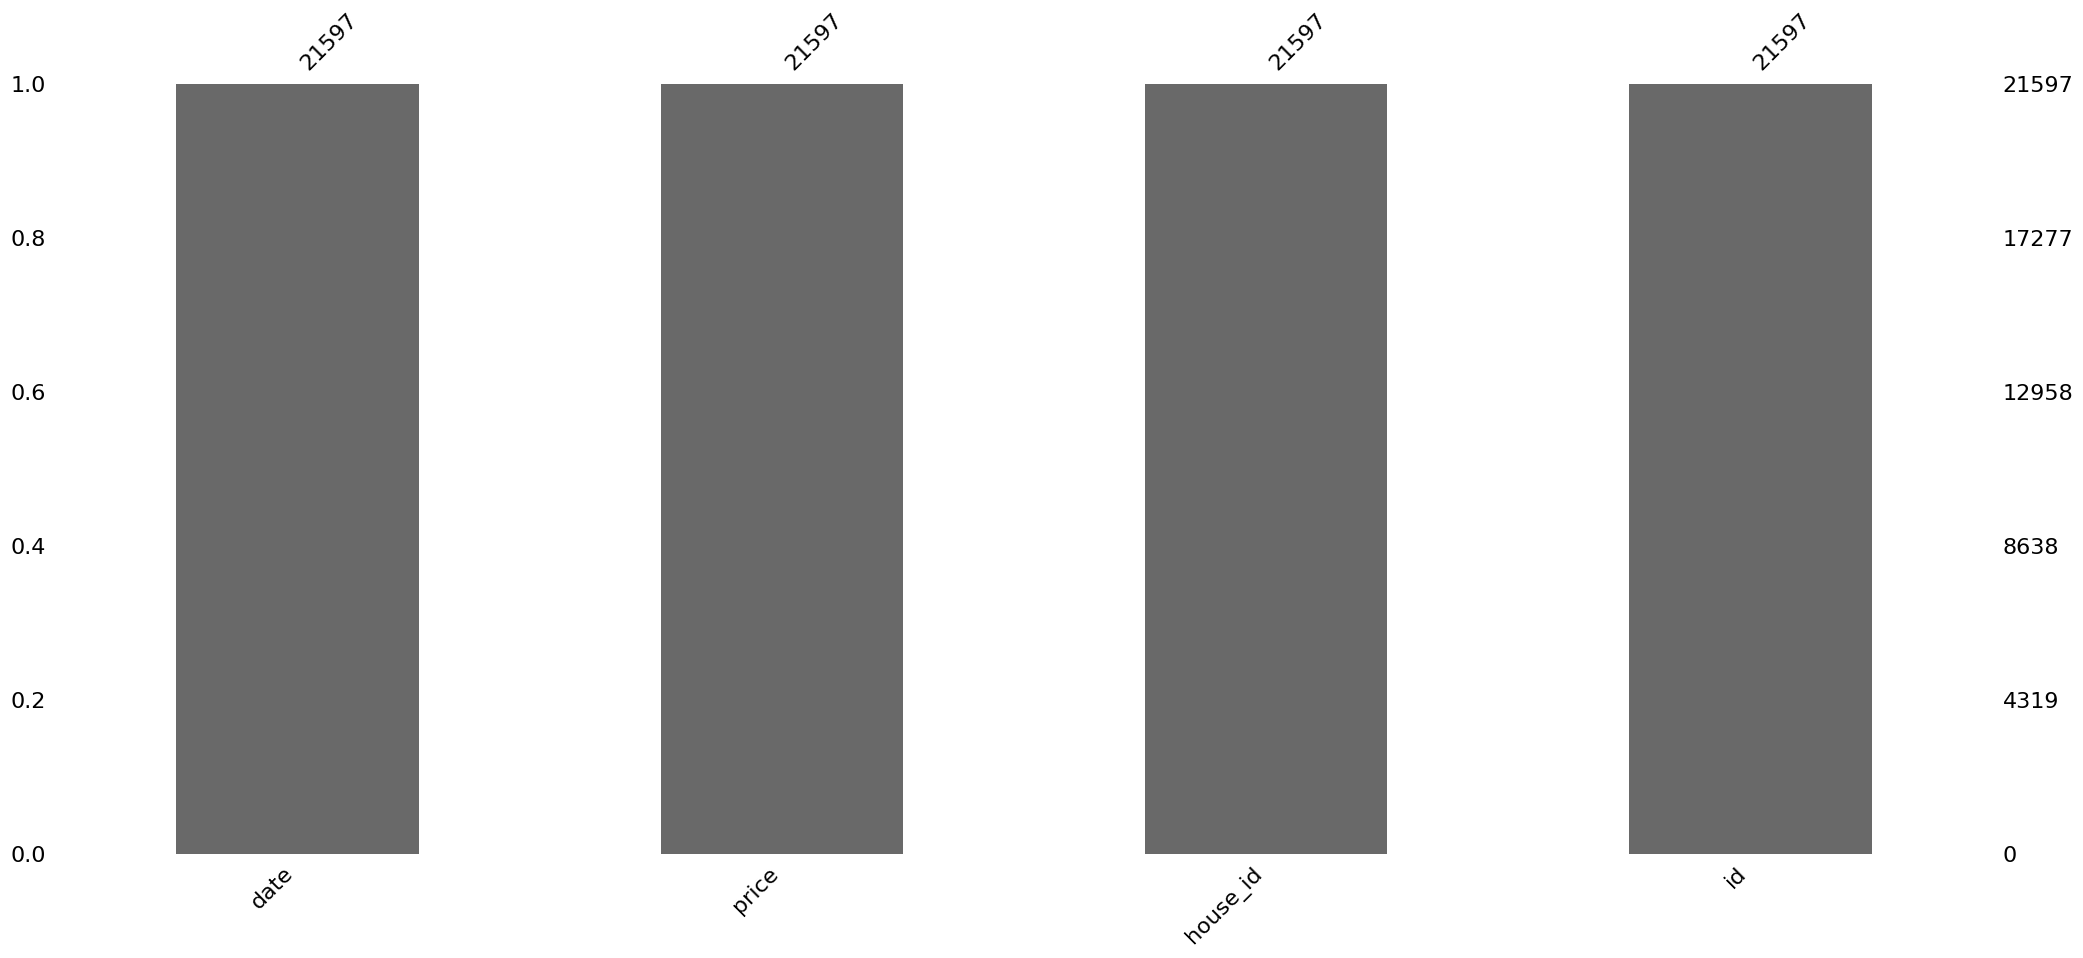

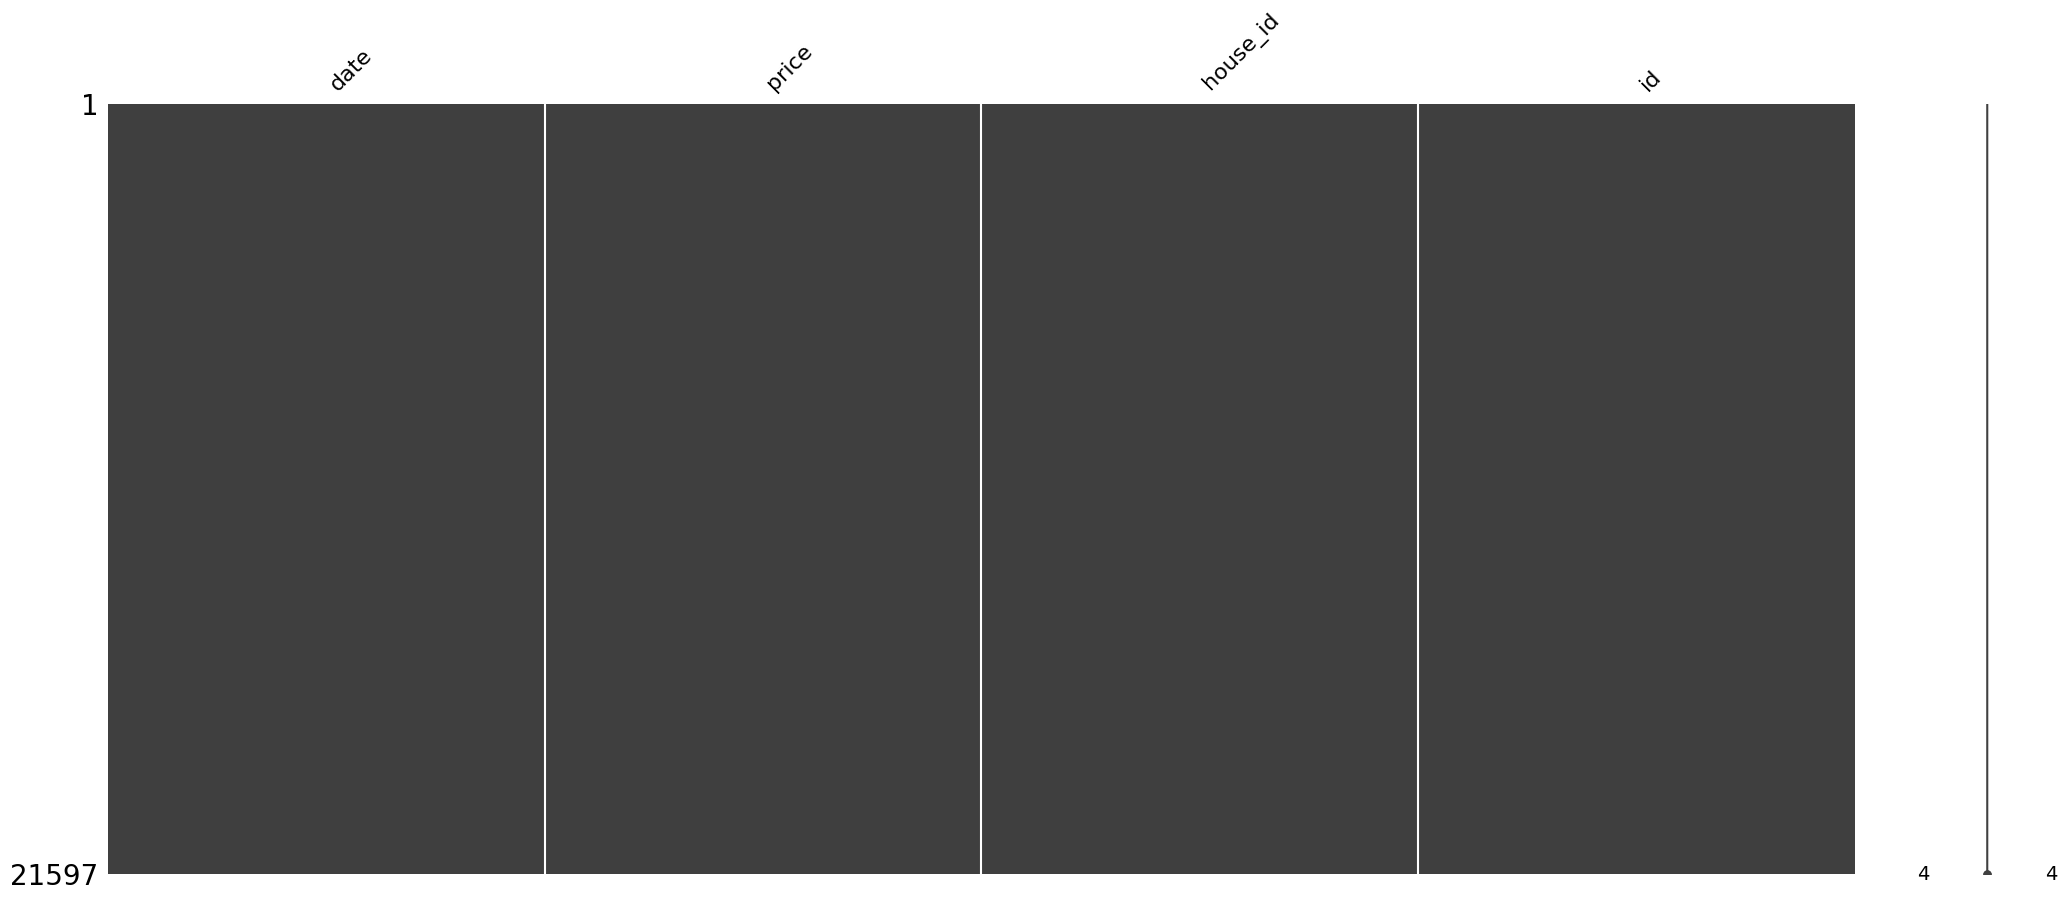

In [8]:
# Finding clues within the data for better decision making

msno.bar(df_prices)
msno.matrix(df_prices)

In [9]:
df_prices.head(20)

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5
5,2014-05-12,1230000.0,7237550310,6
6,2014-06-27,257500.0,1321400060,7
7,2015-01-15,291850.0,2008000270,8
8,2015-04-15,229500.0,2414600126,9
9,2015-03-12,323000.0,3793500160,10


In [10]:
# Join the pandas table based upon the primary_key
df_housing.head(20)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.00,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.00,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.00,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.50,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.00,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0
5,100300280,3.0,2.25,1430.0,4777.0,2.0,0.0,0.0,3,7,1430.0,0.0,2010,0.0,98059,47.4867,-122.152,1639.0,3854.0
6,100300500,3.0,2.50,1520.0,3041.0,2.0,0.0,0.0,3,7,1520.0,0.0,2009,NaN,98059,47.4874,-122.152,1820.0,3229.0
7,100300530,3.0,2.50,1520.0,3003.0,2.0,0.0,0.0,3,7,1520.0,0.0,2009,0.0,98059,47.4876,-122.153,1820.0,3030.0
8,1003400155,3.0,1.00,1100.0,7657.0,1.0,0.0,0.0,3,7,1100.0,0.0,1955,0.0,98188,47.4374,-122.285,1300.0,8000.0
9,1003400245,3.0,1.00,1130.0,9907.0,1.0,0.0,0.0,3,7,1130.0,0.0,1954,0.0,98188,47.4362,-122.286,1320.0,9907.0


In [11]:
updated_prices = df_prices.sort_values(by =['house_id'])
updated_prices.reset_index(inplace=True)
# updated_prices.head()

In [12]:
# Join the tables now
df_list = [df_housing, updated_prices]
# result = pd.concat(df_list, axis=1).reindex(df_housing.index)
# result = pd.concat(df_list, axis=1, join="inner")
# result
# updated_prices

# 1. Data Cleaning

-------

### 1.1 Data exploration and cleaning the data 
-------
* Filtering the columns for our Hypothesis
* Remove unneccessary data
* Drop duplicates if present in the dataset


In [13]:
# Read the housing price data 
def re_read_df_housing_price():
    return  pd.read_csv('data\eda_house_price_details.csv', delimiter=',')

df_housing_prices_data = re_read_df_housing_price()

df_housing_prices_data.head(10)
df_housing_prices_data.tail(10)



,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21587,7852140040,3.0,2.50,2270.0,5536.0,2.0,NaN,0.0,3,8,...,0.0,2003,0.0,98065,47.5389,-121.881,2270.0,5731.0,2014-08-25,507250.0
21588,9834201367,3.0,2.00,1490.0,1126.0,3.0,0.0,0.0,3,8,...,0.0,2014,0.0,98144,47.5699,-122.288,1400.0,1230.0,2015-01-26,429000.0
21589,3448900210,4.0,2.50,2520.0,6023.0,2.0,0.0,NaN,3,9,...,0.0,2014,0.0,98056,47.5137,-122.167,2520.0,6023.0,2014-10-14,610685.0
21590,7936000429,4.0,3.50,3510.0,7200.0,2.0,0.0,0.0,3,9,...,910.0,2009,0.0,98136,47.5537,-122.398,2050.0,6200.0,2015-03-26,1010000.0
21591,2997800021,3.0,2.50,1310.0,1294.0,2.0,0.0,0.0,3,8,...,130.0,2008,0.0,98116,47.5773,-122.409,1330.0,1265.0,2015-02-19,475000.0
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0
21596,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,0.0,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0


In [14]:
# Exploring within the data

#Check the dataset
df_housing_prices_data.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,NaN,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,...,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0


<Axes: >

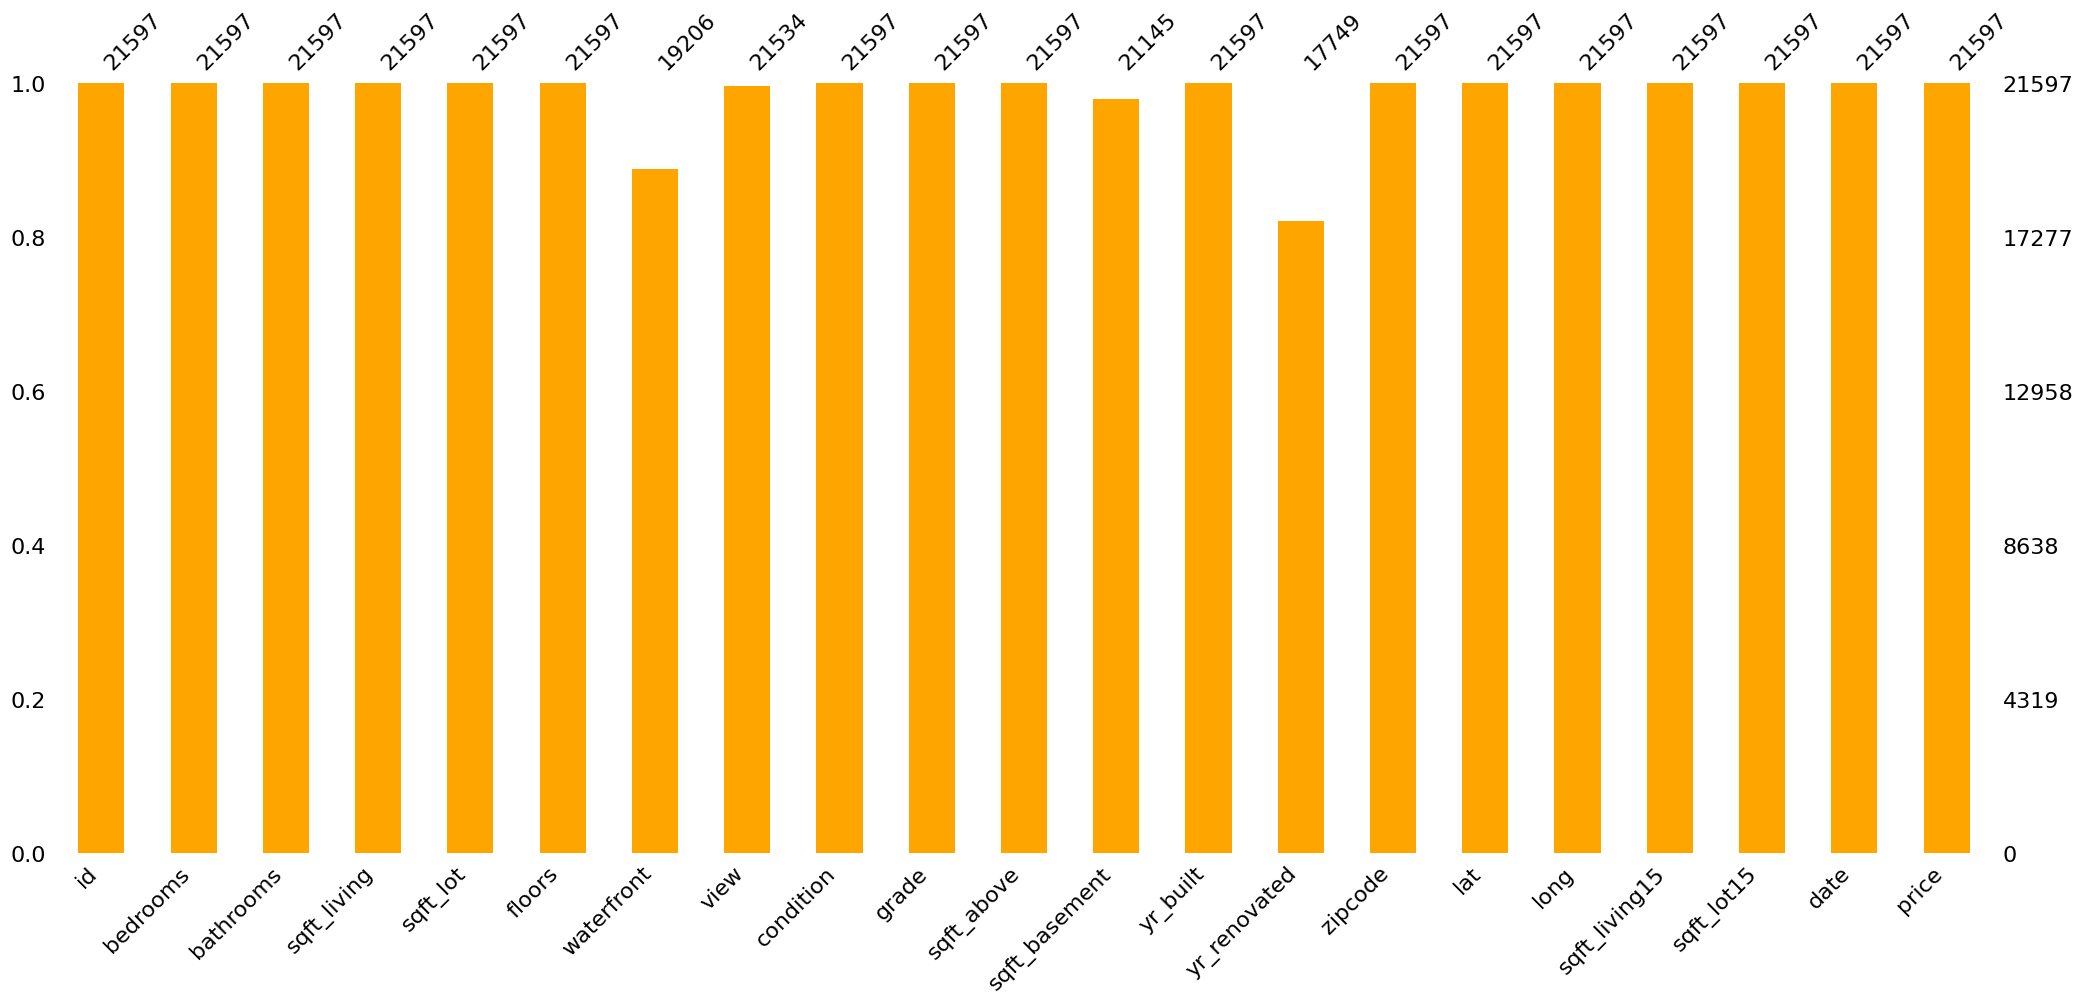

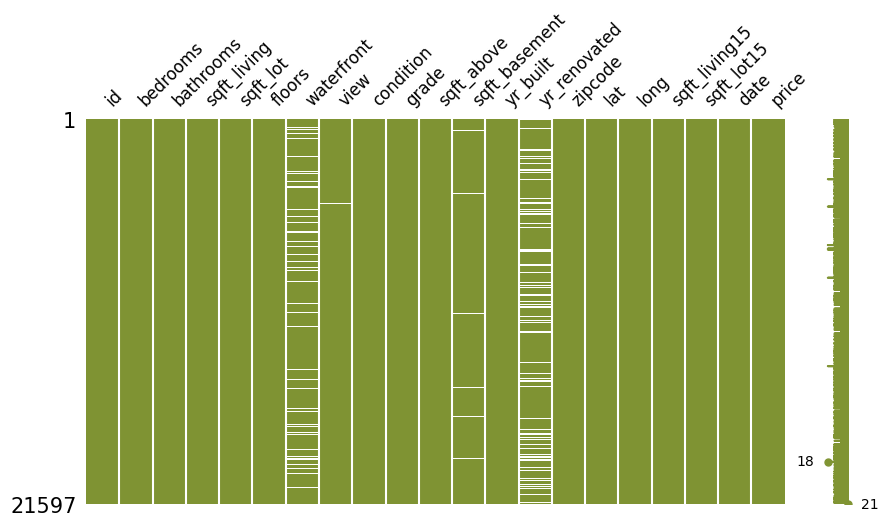

In [15]:
msno.bar(df_housing_prices_data,color='orange')
msno.matrix(df_housing_prices_data, sparkline=True, figsize=(10,5), fontsize=12, color=(0.5, 0.58, 0.2))

In [16]:
#Check if the column naming has no spaces or any unncessary char
df_housing_prices_data.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

In [17]:
# Check for the duplicates within the dataset
df_housing_prices_data.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [18]:
# Check the datatypes
df_housing_prices_data.dtypes
df_housing_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [19]:
# Change the date to datetime format %Y/%m/%d
print('Before:',df_housing_prices_data.date[100],'\n\t',type(df_housing_prices_data.date[100]) )
df_housing_prices_data['date'] = pd.to_datetime(df_housing_prices_data['date'], format='%Y-%m-%d')
print('After:',df_housing_prices_data.date[100],'\n\t',type(df_housing_prices_data.date[100]))

Before: 2014-06-11 
	 <class 'str'>
After: 2014-06-11 00:00:00 
	 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# Seems issue with the year renovated 
# Should be int but is float

# df_housing_prices_data['yr_renovated'].astype({'yr_renovated':int})

#included nan and inf values in this 'yr_renovated'
#locate them
def ret_df_unique_values(df, df_col, text):
    unique_years = df[df_col].unique()
    print('\n',text,unique_years,'\n', type(unique_years),'\n',type(unique_years[0]),'\n',len(unique_years))
    return unique_years

df_housing_prices_data = re_read_df_housing_price()
print(df_housing_prices_data.yr_renovated.shape)
test1 = ret_df_unique_values(df_housing_prices_data, 'yr_renovated', 'Before:')

# Replace nan with 0 (not known or not not renovated!)
# df_housing_prices_data['yr_renovated'] = df_housing_prices_data['yr_renovated'].fillna(0)
# ret_df_unique_values(df_housing_prices_data, 'yr_renovated', 'After1:')

# Replace the appended '0' from the year; which is misleading data
# df_housing_prices_data['yr_renovated'] = df_housing_prices_data['yr_renovated'].astype(str).str[:-1]
# ret_df_unique_values(df_housing_prices_data, 'yr_renovated', 'After2:')

# Convert the yr_renovated to int
# df_housing_prices_data['yr_renovated'] = df_housing_prices_data['yr_renovated'].fillna({'':0})
# df_housing_prices_data['yr_renovated'] = df_housing_prices_data.yr_renovated.astype(int) 
# ret_df_unique_values(df_housing_prices_data, 'yr_renovated', 'After3:')

# First converting yr_renovated to string
df_housing_prices_data['yr_renovated'] = df_housing_prices_data['yr_renovated'].astype(str).str[:-3] #.astype(np.int64)
# df_housing_prices_data['yr_renovated'] = df_housing_prices_data['yr_renovated'].fillna(0, inplace=True)
# Replacing the empty string with 0 and changing type to in
df_housing_prices_data['yr_renovated'] = df_housing_prices_data['yr_renovated'].replace('',0).astype(int)
test2= ret_df_unique_values(df_housing_prices_data, 'yr_renovated', 'After3:')
#Checking if the len remains same , consistent with data
print(df_housing_prices_data.yr_renovated.shape)



# df_housing_prices_data['yr_renovated'].iloc[:, -1] = df_housing_prices_data['yr_renovated'].iloc[:, -1].astype(str).str[-2:].astype(int)
# ret_df_unique_values(df_housing_prices_data, 'yr_renovated', 'After3:')


(21597,)

 Before: [    0. 19910.    nan 20020. 20100. 19920. 20130. 19940. 19780. 20050.
 20030. 19840. 19540. 20140. 20110. 19830. 19450. 19900. 19880. 19770.
 19810. 19950. 20000. 19990. 19980. 19700. 19890. 20040. 19860. 20070.
 19870. 20060. 19850. 20010. 19800. 19710. 19790. 19970. 19500. 19690.
 19480. 20090. 20150. 19740. 20080. 19680. 20120. 19630. 19510. 19620.
 19530. 19930. 19960. 19550. 19820. 19560. 19400. 19760. 19460. 19750.
 19640. 19730. 19570. 19590. 19600. 19670. 19650. 19340. 19720. 19440.
 19580.] 
 <class 'numpy.ndarray'> 
 <class 'numpy.float64'> 
 71

 After3: [   0 1991 2002 2010 1992 2013 1994 1978 2005 2003 1984 1954 2014 2011
 1983 1945 1990 1988 1977 1981 1995 2000 1999 1998 1970 1989 2004 1986
 2007 1987 2006 1985 2001 1980 1971 1979 1997 1950 1969 1948 2009 2015
 1974 2008 1968 2012 1963 1951 1962 1953 1993 1996 1955 1982 1956 1940
 1976 1946 1975 1964 1973 1957 1959 1960 1967 1965 1934 1972 1944 1958] 
 <class 'numpy.ndarray'> 
 <class 'numpy.int64'> 
 